# Convolutional Neural Networks Using MNIST Dataset

In [74]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
import seaborn as sns
from keras import backend as K

In [75]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [76]:
# Shape of MNIST dataset
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


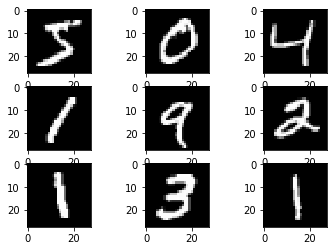

In [77]:
# Plot First few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [78]:
img_rows, img_cols = 28, 28

In [79]:
#To check that images have single channel
if K.image_data_format() == 'channel_first':
    # Reshape dataset to have single channel
    X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
    X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
    inpx = (1,img_rows,img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
    X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
    inpx = (img_rows,img_cols,1)

In [81]:
# Convert Integers to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [82]:
# Normalize 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [83]:
# Convert class vectors to binary class vector
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [84]:
# Make CNN model
inputs = Input(shape=(28,28,1))

layer = Conv2D(32,kernel_size=(3,3),activation='relu')(inputs)
layer = MaxPooling2D(pool_size=(3,3))(layer)

layer = Dropout(0.5)(layer)   # to prevent overfitting

layer = Conv2D(64,kernel_size=(3,3),activation='relu')(layer)
layer = MaxPooling2D(pool_size=(3,3))(layer)

layer = Dropout(0.5)(layer)   # to prevent overfitting

layer = Flatten()(layer)

layer = Dense(256,activation='relu')(layer)   # Creating hidden layer of 256 units

outputs = Dense(10,activation='softmax')(layer) #

model = Model(inputs, outputs)

In [85]:
# Compile the CNN model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.fit(X_train,Y_train,batch_size=32,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 20s 336us/step - loss: 0.4507 - accuracy: 0.8519
Epoch 2/15
60000/60000 [==============================] - 21s 356us/step - loss: 0.1846 - accuracy: 0.9407
Epoch 3/15
60000/60000 [==============================] - 21s 346us/step - loss: 0.1481 - accuracy: 0.9534
Epoch 4/15
60000/60000 [==============================] - 21s 346us/step - loss: 0.1302 - accuracy: 0.9594
Epoch 5/15
60000/60000 [==============================] - 21s 342us/step - loss: 0.1176 - accuracy: 0.9627
Epoch 6/15
60000/60000 [==============================] - 20s 342us/step - loss: 0.1110 - accuracy: 0.9645
Epoch 7/15
60000/60000 [==============================] - 21s 346us/step - loss: 0.0992 - accuracy: 0.9680
Epoch 8/15
60000/60000 [==============================] - 21s 342us/step - loss: 0.0985 - accuracy: 0.9681
Epoch 9/15
60000/60000 [==============================] - 21s 342us/step - loss: 0.0960 - accuracy: 0.9693
Epoch 10/15
60000/60000 [============

In [88]:
# Calculating Loss and Accuracy of model
loss,acc = model.evaluate(X_test, Y_test,verbose=0)
print("Loss : {}\nAccuracy : {} %".format(loss,acc))

Loss : 0.030292620754987003
Accuracy : 0.9904000163078308 %


In [92]:
# Single Value Prediction
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[9])))

9


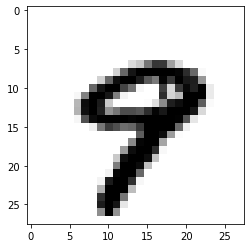

In [94]:
# Single Value Prediction using plot
plt.imshow(X_test[9].reshape(28,28),cmap=plt.cm.binary)
plt.show()